Exploring the Relationship Between Education Levels and Personal Income Across U.S. Counties

Exploratory Questions:

1. How does income vary with education level across counties?

2. Is there a positive correlation between bachelor degree % and income?

3. Which counties have the highest income and highest education levels?

4. Which counties have the lowest income and highest education levels?


*Import and Load Data*

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("EduVsIncomeDataSet.csv")
df.head()

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84
1,35028,NM,"Los Alamos, NM",72366,75949,81306,2766,9098,20.54,67.56
2,8013,CO,"Boulder, CO",79698,83173,89593,45834,135876,21.24,62.97
3,24027,MD,"Howard, MD",78013,82041,86380,42538,136792,19.49,62.67
4,36061,NY,"New York, NY",173525,175327,195543,167960,777483,13.43,62.18


In [41]:
df.columns = ['county_FIPS', 'state', 'county',
              'income_2019', 'income_2020', 'income_2021',
              'associate_deg_num', 'bachelor_deg_num',
              'associate_deg_pct', 'bachelor_deg_pct']

In [42]:
df.isnull().sum()

,0
county_FIPS,0
state,0
county,0
income_2019,0
income_2020,0
income_2021,0
associate_deg_num,0
bachelor_deg_num,0
associate_deg_pct,0
bachelor_deg_pct,0


*Understand The Data*

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   county_FIPS        3006 non-null   int64  
 1   state              3006 non-null   object 
 2   county             3006 non-null   object 
 3   income_2019        3006 non-null   int64  
 4   income_2020        3006 non-null   int64  
 5   income_2021        3006 non-null   int64  
 6   associate_deg_num  3006 non-null   int64  
 7   bachelor_deg_num   3006 non-null   int64  
 8   associate_deg_pct  3006 non-null   float64
 9   bachelor_deg_pct   3006 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 235.0+ KB


In [44]:
df.shape

(3006, 10)

In [45]:
df.dtypes

,0
county_FIPS,int64
state,object
county,object
income_2019,int64
income_2020,int64
income_2021,int64
associate_deg_num,int64
bachelor_deg_num,int64
associate_deg_pct,float64
bachelor_deg_pct,float64


In [46]:
df.describe()

,county_FIPS,income_2019,income_2020,income_2021,associate_deg_num,bachelor_deg_num,associate_deg_pct,bachelor_deg_pct
count,3006.000000,3006.000000,3006.000000,3006.000000,3.006000e+03,3.006000e+03,3006.000000,3006.000000
mean,30182.356287,45947.335329,49513.357951,53308.478377,2.136398e+04,2.401255e+04,31.219654,22.515945
std,15124.962556,13356.350828,13592.470440,14690.294468,6.524051e+04,8.738029e+04,5.299008,9.505486
min,1001.000000,19286.000000,21480.000000,24241.000000,1.600000e+01,0.000000e+00,5.930000,0.000000
25%,18125.500000,38169.750000,41423.250000,44613.500000,2.307500e+03,1.231250e+03,27.720000,15.922500
50%,29185.500000,43515.500000,46976.500000,50513.500000,5.355000e+03,3.292000e+03,31.170000,20.225000
75%,45026.500000,50398.000000,54357.750000,58296.750000,1.486575e+04,1.072400e+04,34.675000,26.640000
max,56045.000000,278682.000000,290674.000000,318297.000000,1.788625e+06,2.317682e+06,81.820000,75.840000


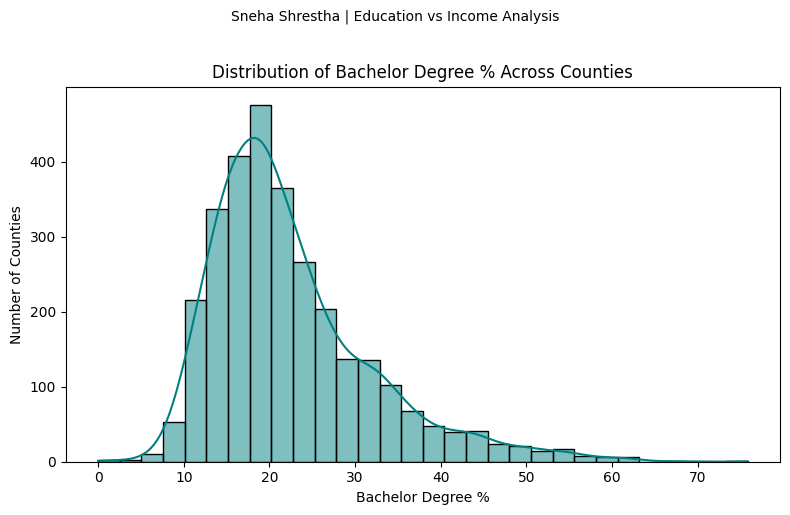

In [57]:
# Distribution of Bachelor Degree Percentage Across Counties
plt.figure(figsize=(8,5))
sns.histplot(df['bachelor_deg_pct'], kde=True, bins=30, color='teal')
plt.title('Distribution of Bachelor Degree % Across Counties')
plt.xlabel('Bachelor Degree %')
plt.ylabel('Number of Counties')
plt.suptitle('Sneha Shrestha | Education vs Income Analysis', fontsize=10, y=1.02)
plt.tight_layout()
plt.savefig('bachelor_deg_distribution.png')
plt.show()

Checking and Handling Outliers

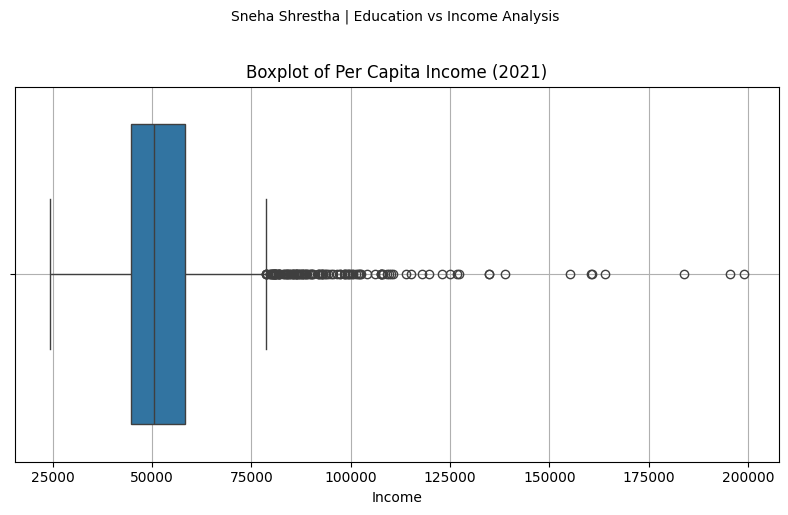

In [58]:
# Boxplot to see outliers in income
plt.figure(figsize=(8,5))
sns.boxplot(x=df['income_2021'])
plt.title('Boxplot of Per Capita Income (2021)')
plt.xlabel('Income')
plt.grid(True)
plt.suptitle('Sneha Shrestha | Education vs Income Analysis', fontsize=10, y=1.02)
plt.tight_layout()
plt.savefig('income_2021_boxplot.png')
plt.show()

In [48]:
df = df[df['income_2021'] != df['income_2021'].max()]

**Question 1:  Does income vary with education level across counties?**

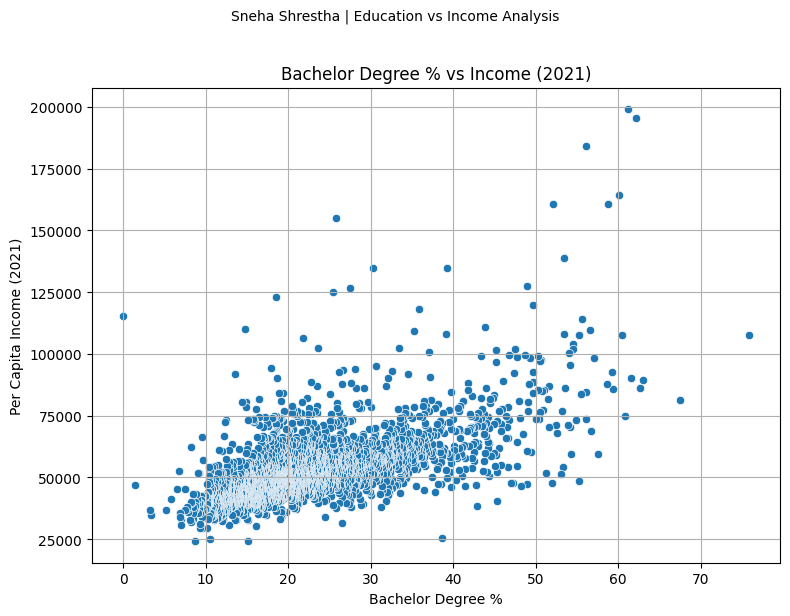

In [59]:
# Scatter plot: Bachelor degree % vs income
plt.figure(figsize=(8,6))
sns.scatterplot(x='bachelor_deg_pct', y='income_2021', data=df)
plt.title('Bachelor Degree % vs Income (2021)')
plt.xlabel('Bachelor Degree %')
plt.ylabel('Per Capita Income (2021)')
plt.grid(True)
plt.suptitle('Sneha Shrestha | Education vs Income Analysis', fontsize=10, y=1.02)
plt.tight_layout()
plt.savefig('bachelor_vs_income_scatter.png')
plt.show()

📊 **Observation from scatter plot**:
- There's a **clear upward trend** — as the percentage of people with bachelor degrees increases, so does the per capita income.
- The relationship isn't perfectly linear, but the **general pattern is positive**.
- A few **outliers** exist (like counties with very high income but not the highest bachelor %), but most data points show that **education and income move together**.

📝 **Answer**:
> The scatter plot shows a **positive relationship** between bachelor degree percentage and per capita income across counties. Counties with higher education levels tend to report higher income. However, the relationship isn't perfectly linear, and there are a few outliers, but the overall trend suggests that education is a strong contributing factor to income variation.

**Question 2: Is there a positive correlation between bachelor degree % and income?**

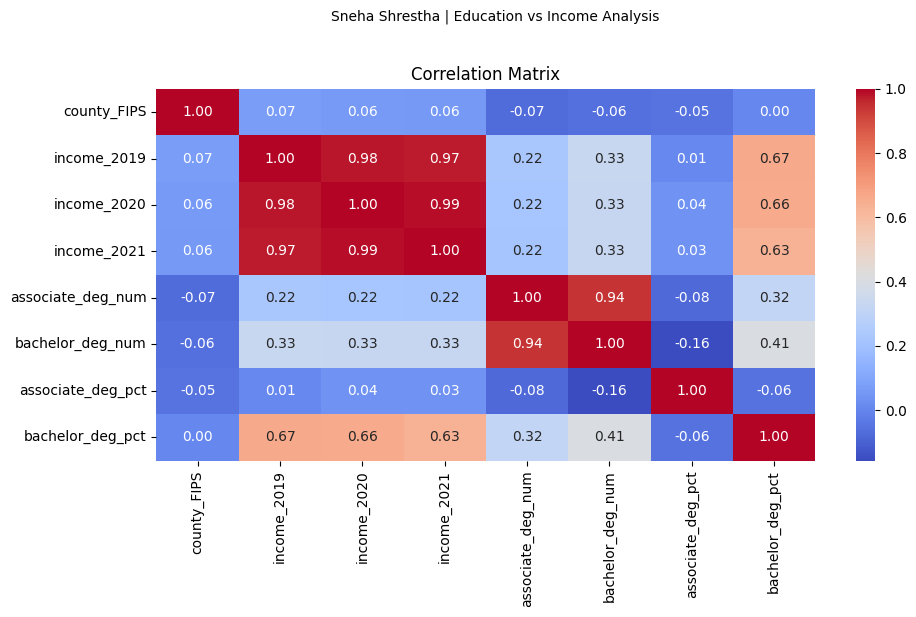

In [60]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.suptitle('Sneha Shrestha | Education vs Income Analysis', fontsize=10, y=1.02)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

📈 **Correlation values**:
- `bachelor_deg_pct` & `income_2019`: **0.67**
- `bachelor_deg_pct` & `income_2020`: **0.66**
- `bachelor_deg_pct` & `income_2021`: **0.63**

📝 **Answer**:
> Yes, there is a **positive correlation** between the percentage of people with a bachelor’s degree and per capita income across U.S. counties. The correlation coefficients range from **0.63 to 0.67** between 2019 and 2021, indicating a **moderately strong relationship**. This means that counties with higher levels of education tend to have higher income, although other factors may also play a role.

In [56]:
# Quick Summary Statistics
summary_stats = df[['income_2021', 'bachelor_deg_pct']].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
           income_2021  bachelor_deg_pct
mean     53220.295840         22.505118
median   50510.000000         20.220000
std      13874.208924          9.488512
min      24241.000000          0.000000
max     198939.000000         75.840000


**Question 3: Which counties have the highest income and highest education levels?**

In [51]:
top_income = df.sort_values(by='income_2021', ascending=False).head(10)
top_edu = df.sort_values(by='bachelor_deg_pct', ascending=False).head(10)

print("\nTop 10 Counties by Income in 2021:\n", top_income[['county', 'state', 'income_2021']])
print("\nTop 10 Counties by Bachelor Degree %:\n", top_edu[['county', 'state', 'bachelor_deg_pct']])


Top 10 Counties by Income in 2021:
                       county state  income_2021
6                 Pitkin, CO    CO       198939
4               New York, NY    NY       195543
18                Summit, UT    UT       183972
9                  Marin, CA    CA       164118
12         San Francisco, CA    CA       160749
42             San Mateo, CA    CA       160485
813  Bristol Bay Borough, AK    AK       155155
35           Santa Clara, CA    CA       138724
531                Union, SD    SD       134811
196               Blaine, ID    ID       134722

Top 10 Counties by Bachelor Degree %:
            county state  bachelor_deg_pct
0   Arlington, VA    VA             75.84
1  Los Alamos, NM    NM             67.56
2     Boulder, CO    CO             62.97
3      Howard, MD    MD             62.67
4    New York, NY    NY             62.18
5     Loudoun, VA    VA             61.62
6      Pitkin, CO    CO             61.17
7      Orange, NC    NC             60.85
8  Williamson, TN

🎯 **Counties appearing in both lists**:
- **New York, NY**
- **Pitkin, CO**
- **Marin, CA**

📝 **Answer**:
> The counties with the highest per capita income in 2021 include **Teton, WY**, **Pitkin, CO**, and **New York, NY**. When it comes to education, **Arlington, VA**, **Los Alamos, NM**, and **Boulder, CO** top the list for bachelor's degree percentages.
>
> Notably, **New York, NY**, **Pitkin, CO**, and **Marin, CA** appear in both lists, indicating that they have both **high income levels** and **high education levels**—suggesting a strong relationship between educational attainment and income in these regions.

**Question 4: Which counties have the lowest income and highest education levels?**

In [52]:
# Find states with high education but low income
median_income = df['income_2021'].median()
high_edu_low_income = df[(df['bachelor_deg_pct'] > 50) & (df['income_2021'] < median_income)]

print("\nCounties with High Education but Low Income:\n", high_edu_low_income[['county', 'state', 'bachelor_deg_pct', 'income_2021']])


Counties with High Education but Low Income:
         county state  bachelor_deg_pct  income_2021
23  Albany, WY    WY             55.27        48528
43   Story, IA    IA             51.95        47923


The output shows the counties that satisfy the defined criteria of having a bachelor's degree percentage greater than 50% and an income in 2021 lower than the median income.

📝 **Answer**:
> Albany County, WY has a bachelor's degree percentage of 55.27% and an income of 48528 in 2021.
Story County, IA has a bachelor's degree percentage of 51.95% and an income of 47923 in 2021.
Therefore, Albany County and Story County are identified as counties with relatively high education levels (bachelor's degree percentage > 50%) but relatively low income (below the median income for 2021).

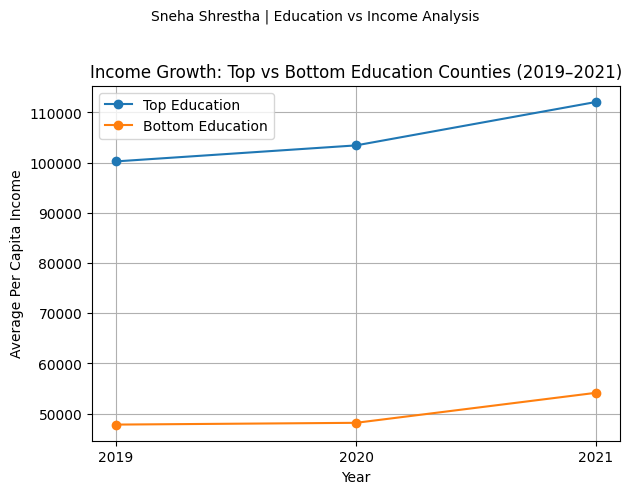

In [61]:
# Trend Analysis: Income Growth for Top vs Bottom Education Counties
top_bachelor = df.sort_values(by='bachelor_deg_pct', ascending=False).head(5)
bottom_bachelor = df.sort_values(by='bachelor_deg_pct').head(5)

# Plot average income growth
for subset, label in zip([top_bachelor, bottom_bachelor], ['Top Education', 'Bottom Education']):
    subset_mean = subset[['income_2019', 'income_2020', 'income_2021']].mean()
    plt.plot(subset_mean.index.str[-4:], subset_mean.values, marker='o', label=label)

plt.title('Income Growth: Top vs Bottom Education Counties (2019–2021)')
plt.xlabel('Year')
plt.ylabel('Average Per Capita Income')
plt.legend()
plt.grid(True)
plt.suptitle('Sneha Shrestha | Education vs Income Analysis', fontsize=10, y=1.02)
plt.tight_layout()
plt.savefig('income_growth_trends.png')
plt.show()


In [53]:
# Save cleaned dataset
df.to_csv('cleaned_income_education.csv', index=False)

### 🔍 Summary:

- **Education and Income are positively correlated** across U.S. counties.
- Counties like **New York, NY**, **Marin, CA**, and **Pitkin, CO** perform highly in both education and income.
- Some counties (e.g., **Albany County, WY**) demonstrate **high education but lower income**, indicating potential underemployment or cost-of-living dynamics.
- This analysis provides insight for **policy-makers, educators, and economists** exploring how investment in education might drive regional prosperity.
